### Subchallenge - 2

For this model fitting we have merged three datasets together - cfRNA.csv, metabolome.csv and microbiome.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [2]:
cfrna_df = pd.read_csv('cfRNA.csv')
cfrna_df.head()

,SampleID,C2orf76,ACTL10,CEP135,RP11-613M10.6,NDUFB5P1,MIIP,RP11-98I9.4,C20orf144,RP11-485G7.6,...,LL22NC03-86G7.1,DNAL4,PPM1F,CCDC94,CLN6,RP11-500C11.3,CTBP2P7,ITIH2,RBPMSLP,ABCA8
0,K1,0.312437,-1.892930e-16,28.217854,-5.273559e-18,-6.106227e-18,10.107555,0.070008,-3.885781e-16,-4.113376e-16,...,0.707989,4.504731,55.583978,14.308368,1.934940,-1.826317e-16,-2.797762e-16,-1.122435e-15,0,-1.474376e-15
1,I1,1.849737,0.000000e+00,54.567231,9.248683e-01,0.000000e+00,17.110064,2.774605,0.000000e+00,0.000000e+00,...,0.000000,7.398947,92.486832,16.647630,3.237039,4.624342e-01,0.000000e+00,4.624342e-01,0,0.000000e+00
2,J1,5.204209,1.734736e+00,53.776824,0.000000e+00,0.000000e+00,4.336841,1.734736,0.000000e+00,0.000000e+00,...,1.734736,10.408418,89.338918,19.949467,4.336841,8.673681e-01,0.000000e+00,8.673681e-01,0,0.000000e+00
3,P1,0.000000,0.000000e+00,15.269087,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,3.053817,0.000000,45.807261,9.161452,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00
4,L1,0.000000,0.000000e+00,11.048308,0.000000e+00,0.000000e+00,19.886954,2.209662,0.000000e+00,0.000000e+00,...,0.000000,26.515938,57.451200,37.564246,4.419323,0.000000e+00,0.000000e+00,0.000000e+00,0,2.209662e+00


In [3]:
metabolome_df = pd.read_csv('metabolome.csv', encoding= 'unicode_escape') 
metabolome_df.head()

,SampleID,N1-Methyl-2-pyridone-5-carboxamide|N1-Methyl-4-pyridone-3-carboxamide|N-[(Aminooxy)Carbonyl]Aniline,Barringtogenol C|Camelliagenin C|Ganoderiol H|ED-71,3beta-Acetoxy-11alpha-methoxy-12-ursen-28-oic acid,Basilimoside,(2s)-Pyrrolidin-2-Ylmethylamine,4-Methylpiperazin-1-Yl Carbonyl Group,Chlorpromazine|Chlorpromazine,"DG(15:0/18:4(6Z,9Z,12Z,15Z)/0:0)|DG(18:4(6Z,9Z,12Z,15Z)/15:0/0:0)|DG(15:0/0:0/18:4n3)","DG(15:0/18:3(6Z,9Z,12Z)/0:0)|DG(15:0/18:3(9Z,12Z,15Z)/0:0)|DG(18:3(6Z,9Z,12Z)/15:0/0:0)|DG(18:3(9Z,12Z,15Z)/15:0/0:0)|DG(15:0/0:0/18:3n6)|DG(15:0/0:0/18:3n3)|DG(14:1n5/0:0/18:2n6)|DG(14:1n5/0:0/20:2n6)",...,"PE(18:4(6Z,9Z,12Z,15Z)/P-18:1(11Z))|PE(18:4(6Z,9Z,12Z,15Z)/P-18:1(9Z))|PE(20:5(5Z,8Z,11Z,14Z,17Z)/P-16:0)|PE(P-16:0/20:5(5Z,8Z,11Z,14Z,17Z))|PE(P-18:1(11Z)/18:4(6Z,9Z,12Z,15Z))|PE(P-18:1(9Z)/18:4(6Z,9Z,12Z,15Z)).2",Glycerol triundecanoate.2,"DG(15:0/18:2(9Z,12Z)/0:0)|DG(18:2(9Z,12Z)/15:0/0:0)|DG(14:0/0:0/18:2n6)|DG(14:0/0:0/20:2n6).5",beta-Casomorphin (1-6),Glycerol triundecanoate.3,DG(15:0/18:1(11Z)/0:0)|DG(15:0/18:1(9Z)/0:0)|DG(18:1(11Z)/15:0/0:0)|DG(18:1(9Z)/15:0/0:0)|DG(15:0/0:0/18:1n7)|DG(15:0/0:0/18:1n9).1,Tetracosyl ferulate|Diisotridecyl phthalate|Ditridecyl phthalate.1,"PE(14:0/20:2(11Z,14Z))|PE(14:1(9Z)/20:1(11Z))|PE(16:0/18:2(9Z,12Z))|PE(16:1(9Z)/18:1(11Z))|PE(16:1(9Z)/18:1(9Z))|PE(18:1(11Z)/16:1(9Z))|PE(18:1(9Z)/16:1(9Z))|PE(18:2(9Z,12Z)/16:0)|PE(20:1(11Z)/14:1(9Z))|PE(20:2(11Z,14Z)/14:0).2",Isatoribine.2,Thelephoric acid|Triphenylantimony
0,K1,-0.103676,-0.107316,-0.114072,-0.123576,-0.130470,-0.129842,0.458028,-0.125868,-0.091913,...,-0.023383,0.058349,-0.110397,-0.129338,0.058349,-0.126018,-0.127577,0.471133,-0.082986,-0.111185
1,I1,-0.106104,-0.102340,-0.114762,-0.112528,-0.121543,-0.121023,0.581264,-0.107119,-0.060870,...,-0.088652,0.111161,-0.074311,-0.120299,0.111161,-0.120831,-0.109388,0.247993,-0.064317,-0.101570
2,J1,-0.090160,-0.095522,-0.104440,-0.111375,-0.118311,-0.116782,1.165663,-0.114666,-0.066885,...,-0.096634,0.245532,-0.066543,-0.117976,0.245532,-0.119000,-0.113882,0.216611,-0.067518,-0.100414
3,P1,-0.122656,-0.122855,-0.119838,-0.121280,-0.126312,-0.125989,0.548471,-0.122446,-0.088633,...,-0.068637,0.406959,-0.070162,-0.124218,0.406959,-0.120697,-0.124618,0.767959,-0.094195,-0.116142
4,L1,-0.117107,-0.041200,-0.079896,-0.085238,-0.125743,-0.125410,0.596032,-0.083979,0.064603,...,-0.071680,0.417410,-0.059560,-0.124798,0.417410,-0.111645,-0.119185,0.272326,-0.071258,-0.105243


In [4]:
microbiome_df = pd.read_csv('microbiome.csv')
microbiome_df.head()

,SampleID,VaginalSwab_Lactobacillus,Saliva_Lactobacillus,ToothGum_Lactobacillus,Stool_Lactobacillus,VaginalSwab_Lactobacillus.1,Saliva_Lactobacillus.1,ToothGum_Lactobacillus.1,Stool_Lactobacillus.1,VaginalSwab_Streptococcus,...,ToothGum_Azospirillum,Stool_Azospirillum,VaginalSwab_Sphingomonas.5,Saliva_Sphingomonas.5,ToothGum_Sphingomonas.5,Stool_Sphingomonas.5,VaginalSwab_Thalassospira.9,Saliva_Thalassospira.9,ToothGum_Thalassospira.9,Stool_Thalassospira.9
0,K1,103.491092,0.435833,0.004819,1.266310,103.491092,0.435833,0.004819,1.266310,-0.004111,...,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970
1,I1,0.108275,-0.028496,-0.022462,0.057991,0.108275,-0.028496,-0.022462,0.057991,-0.028496,...,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,0.204818
2,J1,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,...,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.015173
3,P1,-0.016359,-0.032342,-0.032342,-0.032342,-0.016359,-0.032342,-0.032342,-0.032342,-0.032342,...,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342
4,L1,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,...,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554


In [5]:
meta_info_df = pd.read_csv('challenge-meta-information.csv')
meta_info_df.head()

,time,GA,SampleID,randPerson,data
0,1,11.0,K1,K,train
1,1,11.0,J1,J,train
2,1,11.0,P1,P,train
3,1,11.0,L1,L,train
4,1,11.0,H1,H,train


In [6]:
df = cfrna_df.merge(metabolome_df).merge(microbiome_df)
df.head()

,SampleID,C2orf76,ACTL10,CEP135,RP11-613M10.6,NDUFB5P1,MIIP,RP11-98I9.4,C20orf144,RP11-485G7.6,...,ToothGum_Azospirillum,Stool_Azospirillum,VaginalSwab_Sphingomonas.5,Saliva_Sphingomonas.5,ToothGum_Sphingomonas.5,Stool_Sphingomonas.5,VaginalSwab_Thalassospira.9,Saliva_Thalassospira.9,ToothGum_Thalassospira.9,Stool_Thalassospira.9
0,K1,0.312437,-1.892930e-16,28.217854,-5.273559e-18,-6.106227e-18,10.107555,0.070008,-3.885781e-16,-4.113376e-16,...,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970,-0.021970
1,I1,1.849737,0.000000e+00,54.567231,9.248683e-01,0.000000e+00,17.110064,2.774605,0.000000e+00,0.000000e+00,...,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,-0.028496,0.204818
2,J1,5.204209,1.734736e+00,53.776824,0.000000e+00,0.000000e+00,4.336841,1.734736,0.000000e+00,0.000000e+00,...,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.027296,-0.015173
3,P1,0.000000,0.000000e+00,15.269087,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342,-0.032342
4,L1,0.000000,0.000000e+00,11.048308,0.000000e+00,0.000000e+00,19.886954,2.209662,0.000000e+00,0.000000e+00,...,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554,-0.031554


In [7]:
df.shape

(68, 59309)


## Feature Scaling

In [8]:
sampleID = df['SampleID']
df_cols = list(df.columns)
df_cols.remove('SampleID')
scaling_pipeline = Pipeline([('min_max_scaler', MinMaxScaler())])
scaled_df = pd.DataFrame(scaling_pipeline.fit_transform(df.drop('SampleID', axis=1)), columns = df_cols)
scaled_df['SampleID'] = sampleID
scaled_df.head()

C:\Users\91706\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,C2orf76,ACTL10,CEP135,RP11-613M10.6,NDUFB5P1,MIIP,RP11-98I9.4,C20orf144,RP11-485G7.6,CCDC86,...,Stool_Azospirillum,VaginalSwab_Sphingomonas.5,Saliva_Sphingomonas.5,ToothGum_Sphingomonas.5,Stool_Sphingomonas.5,VaginalSwab_Thalassospira.9,Saliva_Thalassospira.9,ToothGum_Thalassospira.9,Stool_Thalassospira.9,SampleID
0,0.004701,0.000000e+00,0.113866,0.000000e+00,0.000000e+00,0.129301,0.011492,0.000000e+00,0.000000e+00,0.055001,...,0.831894,0.831894,0.831894,0.831894,0.831894,0.831894,0.831894,0.831894,0.025991,K1
1,0.027830,2.251035e-17,0.220192,9.470124e-01,1.106058e-17,0.218881,0.455442,2.959799e-17,3.577445e-17,0.141142,...,0.591695,0.591695,0.591695,0.591695,0.591695,0.591695,0.591695,0.591695,0.286813,I1
2,0.078300,2.062914e-01,0.217003,5.399824e-18,1.106058e-17,0.055479,0.284751,2.959799e-17,3.577445e-17,0.099275,...,0.635870,0.635870,0.635870,0.635870,0.635870,0.635870,0.635870,0.635870,0.033809,J1
3,0.000000,2.251035e-17,0.061615,5.399824e-18,1.106058e-17,0.000000,0.000000,2.959799e-17,3.577445e-17,0.087382,...,0.450114,0.450114,0.450114,0.450114,0.450114,0.450114,0.450114,0.450114,0.014063,P1
4,0.000000,2.251035e-17,0.044583,5.399824e-18,1.106058e-17,0.254405,0.362708,2.959799e-17,3.577445e-17,0.042152,...,0.479108,0.479108,0.479108,0.479108,0.479108,0.479108,0.479108,0.479108,0.014969,L1


Text(0.5, 1.0, 'Cell Free RNA, Metabolome, Microbiome')

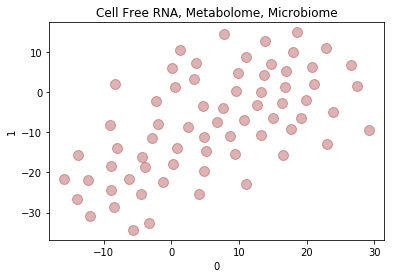

In [9]:
tsne = TSNE(n_components=2)
data = pd.DataFrame(tsne.fit_transform(scaled_df.drop('SampleID', axis=1)), columns = ['0', '1'])
sns.regplot(x='0', y='1', data=data, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":100})
plt.title('Cell Free RNA, Metabolome, Microbiome') 

## train test split

In [10]:
merged_df = pd.merge(df, meta_info_df, how='left', on='SampleID')
train = merged_df[merged_df.data == 'train']
test = merged_df[merged_df.data == 'test']
train.drop(['data', 'randPerson'], axis=1, inplace=True)
test.drop(['data', 'randPerson'], axis=1, inplace=True)
train.set_index('SampleID', inplace=True)
test.set_index('SampleID', inplace=True)

C:\Users\91706\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
train.shape

(56, 59310)

In [12]:
test.shape

(12, 59310)

In [13]:
def check_missing_values(df):
    for col in df.columns:
        nan_values = df[col].isna().sum()
        if nan_values > 0:
            break
            return True       
    return False

In [14]:
print('missing values in training data: {}'.format(check_missing_values(train)))
print('missing values in testing data: {}'.format(check_missing_values(test)))

missing values in training data: False
missing values in testing data: False



## X-y split

In [15]:
# X-Y split
y_train = train.GA
X_train = train.drop('GA', axis=1)
y_test = test.GA
X_test = test.drop('GA', axis=1)

### Feature Selection

In [16]:
rf = RandomForestRegressor(n_estimators=200, random_state = 21)
feature_selector = SelectFromModel(estimator=rf, max_features=100)
feature_selector.fit(X_train, y_train)
selected_features = X_train.columns[(feature_selector.get_support())]
selected_features

Index(['MPZL1', 'HEXDC', 'VASH1', 'HN1', 'ZNF142', 'MTATP8P2', 'MRPL15',
       'LIMS3', 'C1GALT1C1', 'PCMT1', 'MAFB', 'FBXW5', 'EEF1A1P17',
       'LINC00649', 'TAF5L', 'PPFIBP1', 'ZNF25', 'RHOA',
       'DG(15:0/18:4(6Z,9Z,12Z,15Z)/0:0)|DG(18:4(6Z,9Z,12Z,15Z)/15:0/0:0)|DG(15:0/0:0/18:4n3)',
       'Aciclovir|Aciclovir',
       'PE(18:1(11Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))|PE(18:1(9Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))|PE(18:2(9Z,12Z)/22:5(4Z,7Z,10Z,13Z,16Z))|PE(18:2(9Z,12Z)/22:5(7Z,10Z,13Z,16Z,19Z))|PE(18:3(6Z,9Z,12Z)/22:4(7Z,10Z,13Z,16Z))|PE(18:3(9Z,12Z,15Z)/22:4(7Z,10Z,13Z,16Z))|PE(20:2(11Z,14Z)/20:5(5Z,8Z,11Z,14Z,17Z))|PE(20:3(5Z,8Z,11Z)/20:4(5Z,8Z,11Z,14Z))|PE(20:3(5Z,8Z,11Z)/20:4(8Z,11Z,14Z,17Z))|PE(20:3(8Z,11Z,14Z)/20:4(5Z,8Z,11Z,14Z))|PE(20:3(8Z,11Z,14Z)/20:4(8Z,11Z,14Z,17Z))|PE(20:4(5Z,8Z,11Z,14Z)/20:3(5Z,8Z,11Z))|PE(20:4(5Z,8Z,11Z,14Z)/20:3(8Z,11Z,14Z))|PE(20:4(8Z,11Z,14Z,17Z)/20:3(5Z,8Z,11Z))|PE(20:4(8Z,11Z,14Z,17Z)/20:3(8Z,11Z,14Z))|PE(20:5(5Z,8Z,11Z,14Z,17Z)/20:2(11Z,14Z))|PE(22:4

In [17]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Random Forest

In [18]:
n_estimators = [10, 100, 500, 1000]
max_depth = [None, 4, 18, 25]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv = 3)
grid_search.fit(X_train, y_train)

C:\Users\91706\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 4, 18, 25], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [20]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

7.429892176870747

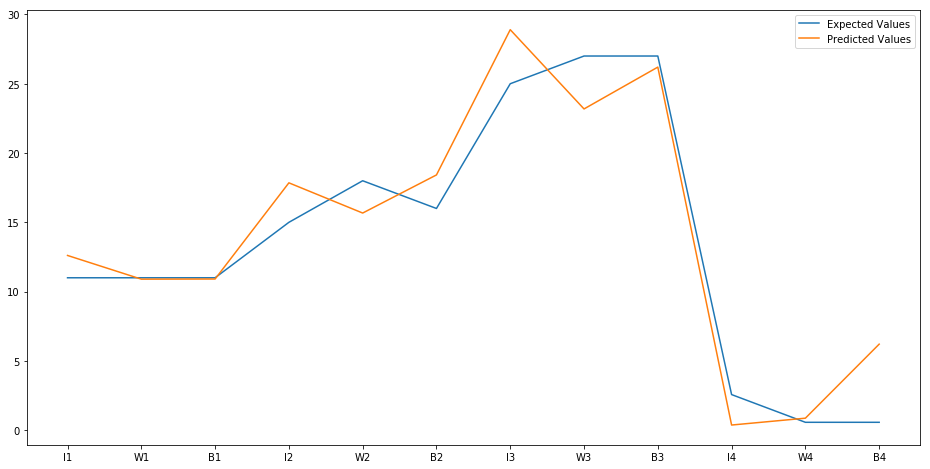

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Expected Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()

In [22]:
predicted_res = y_test.to_frame().reset_index()
predicted_res['predicted.GA'] = y_pred
predicted_res.drop('GA', axis=1, inplace=True)
sc2_result = pd.read_csv('submission-format.csv')
sc2_result.drop('predicted.GA', axis=1, inplace=True)
sc2_result = pd.merge(left=sc2_result, right=predicted_res, on='SampleID', how='left')
sc2_result

,SampleID,GA,predicted.GA
0,I1,11.000000,12.610000
1,W1,11.000000,10.900000
2,B1,11.000000,10.910000
3,I2,15.000000,17.850000
4,W2,18.000000,15.670000
5,B2,16.000000,18.420000
6,I3,25.000000,28.900000
7,W3,27.000000,23.181429
8,B3,27.000000,26.200000
9,I4,2.571429,0.374286


## Elastic Net

In [24]:
elastic_net = ElasticNet(alpha=0.8, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
pred_test = elastic_net.predict(X_test)
mean_absolute_error(y_test, pred_test)

4.626419192069914

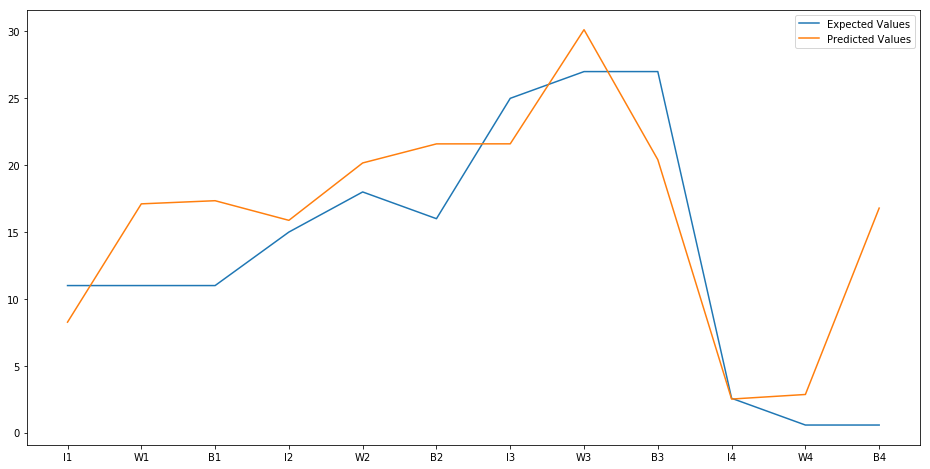

In [27]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Expected Values')
plt.plot(pred_test, label='Predicted Values')
plt.legend()

In [28]:
sc2_result.to_csv('SC2_output.csv', index=False)